In [2]:
from percolation import TemporalPercolation
import pathpyG as pp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import itertools

In [3]:
def preprocess(dataset_name: str):
    """
    read the original data file and return the DataFrame that has columns ['u', 'i', 'ts', 'label', 'idx']
    :param dataset_name: str, dataset name
    :return:
    """
    u_list, i_list, ts_list, label_list = [], [], [], []
    feat_l = []
    idx_list = []

    with open(dataset_name) as f:
        # skip the first line
        s = next(f)
        previous_time = -1
        for idx, line in enumerate(f):
            e = line.strip().split(' ')
            # user_id
            u = int(e[0])
            # item_id
            i = int(e[1])

            # timestamp
            ts = float(e[2])
            # check whether time in ascending order

            u_list.append(u)
            i_list.append(i)
            ts_list.append(ts)
            
            # edge index
            idx_list.append(idx)

            
    return pd.DataFrame({'u': u_list,
                         'i': i_list,
                         'ts': ts_list,
                         'idx': idx_list})

In [ ]:
file_path = "reddit_dataset.txt"
bipartite = True

df  = preprocess(file_path)

print("Dataset Preview:")
print(df.head())
print(df['ts'].max())
print(df['ts'].min())
print(df['ts'].max() - df['ts'].min())
df['normalized_ts'] = (df['ts'] - df['ts'].min()) / 3600 # Normalize and converting to hours

print("Normalized Timestamp Range:", df['normalized_ts'].min(), "-", df['normalized_ts'].max())
tedges = list(df[['u', 'i', 'normalized_ts']].itertuples(index=False, name=None))

temporal_graph = pp.TemporalGraph.from_edge_list(tedges)
total_events = len(tedges)

bipartite_percolation = TemporalPercolation(temporal_graph, total_events)

print("Min Timestamp:", df['normalized_ts'].min())
print("Max Timestamp:", df['normalized_ts'].max())


delta_t_values = np.linspace(df['normalized_ts'].min(), df['normalized_ts'].max(), 400)

# I computed the results and saved them to a JSON file
analysis_results, percolation_metrics = bipartite_percolation.percolation_analysis(delta_t_values)

# with open("reddit/analysis_results.json", "w") as file:
#     json.dump(analysis_results, file, indent=4)

# Load results from the JSON file
# with open("reddit/analysis_results.json", "r") as file:
#     analysis_results = json.load(file)


Dataset Preview:
   u  i            ts  idx
0  3  2  1.333573e+09    0
1  4  1  1.333563e+09    1
2  5  4  1.333573e+09    2
3  4  5  1.333573e+09    3
4  6  4  1.333573e+09    4
1335283594.0
1333561353.0
1722241.0
Normalized Timestamp Range: 0.0 - 478.4002777777778
Min Timestamp: 0.0
Max Timestamp: 478.4002777777778
Processing δ=0.0...


100%|██████████| 2440/2440 [00:00<00:00, 9079.26it/s] 


Error at δ=0.0: torch.cat(): expected a non-empty list of Tensors
Processing δ=1.1989981899192426...


100%|██████████| 2440/2440 [00:00<00:00, 2895.84it/s]


Processing δ=2.397996379838485...


100%|██████████| 2440/2440 [00:00<00:00, 3147.31it/s]


Processing δ=3.5969945697577277...


100%|██████████| 2440/2440 [00:00<00:00, 3110.98it/s]


Processing δ=4.79599275967697...


100%|██████████| 2440/2440 [00:00<00:00, 3245.32it/s]


Processing δ=5.994990949596213...


100%|██████████| 2440/2440 [00:00<00:00, 3668.91it/s]


Processing δ=7.193989139515455...


100%|██████████| 2440/2440 [00:00<00:00, 3345.86it/s]


Processing δ=8.392987329434698...


100%|██████████| 2440/2440 [00:00<00:00, 3568.18it/s]


Processing δ=9.59198551935394...


100%|██████████| 2440/2440 [00:00<00:00, 3342.25it/s]


Processing δ=10.790983709273183...


100%|██████████| 2440/2440 [00:00<00:00, 3359.31it/s]


Processing δ=11.989981899192426...


100%|██████████| 2440/2440 [00:00<00:00, 3443.34it/s]


Processing δ=13.188980089111668...


100%|██████████| 2440/2440 [00:00<00:00, 3246.00it/s]


Processing δ=14.38797827903091...


100%|██████████| 2440/2440 [00:00<00:00, 3130.98it/s]


Processing δ=15.586976468950153...


100%|██████████| 2440/2440 [00:00<00:00, 3592.13it/s]


Processing δ=16.785974658869396...


100%|██████████| 2440/2440 [00:00<00:00, 3298.10it/s]


Processing δ=17.984972848788637...


100%|██████████| 2440/2440 [00:00<00:00, 3489.87it/s]


Processing δ=19.18397103870788...


100%|██████████| 2440/2440 [00:00<00:00, 3444.86it/s]


Processing δ=20.382969228627125...


100%|██████████| 2440/2440 [00:00<00:00, 3470.67it/s]


Processing δ=21.581967418546366...


100%|██████████| 2440/2440 [00:00<00:00, 3362.64it/s]


Processing δ=22.780965608465607...


100%|██████████| 2440/2440 [00:00<00:00, 3438.15it/s]


Processing δ=23.97996379838485...


100%|██████████| 2440/2440 [00:00<00:00, 3345.59it/s]


Processing δ=25.178961988304096...


100%|██████████| 2440/2440 [00:00<00:00, 3516.22it/s]


Processing δ=26.377960178223336...


100%|██████████| 2440/2440 [00:00<00:00, 3263.22it/s]


Processing δ=27.576958368142577...


100%|██████████| 2440/2440 [00:00<00:00, 3082.50it/s]


Processing δ=28.77595655806182...


100%|██████████| 2440/2440 [00:00<00:00, 3341.41it/s]


Processing δ=29.974954747981066...


100%|██████████| 2440/2440 [00:00<00:00, 3550.64it/s]


Processing δ=31.173952937900307...


100%|██████████| 2440/2440 [00:00<00:00, 3466.08it/s]


Processing δ=32.37295112781955...


100%|██████████| 2440/2440 [00:00<00:00, 3710.42it/s]


Processing δ=33.57194931773879...


100%|██████████| 2440/2440 [00:00<00:00, 3335.14it/s]


Processing δ=34.770947507658036...


100%|██████████| 2440/2440 [00:00<00:00, 3581.50it/s]


Processing δ=35.96994569757727...


100%|██████████| 2440/2440 [00:00<00:00, 3225.85it/s]


Processing δ=37.16894388749652...


100%|██████████| 2440/2440 [00:00<00:00, 3260.70it/s]


Processing δ=38.36794207741576...


100%|██████████| 2440/2440 [00:00<00:00, 3568.02it/s]


Processing δ=39.566940267335006...


100%|██████████| 2440/2440 [00:00<00:00, 3160.06it/s]


Processing δ=40.76593845725425...


100%|██████████| 2440/2440 [00:00<00:00, 3537.71it/s]


Processing δ=41.96493664717349...


100%|██████████| 2440/2440 [00:00<00:00, 3372.49it/s]


Processing δ=43.16393483709273...


100%|██████████| 2440/2440 [00:00<00:00, 3695.14it/s]


Processing δ=44.36293302701198...


100%|██████████| 2440/2440 [00:00<00:00, 3281.69it/s]


Processing δ=45.561931216931214...


100%|██████████| 2440/2440 [00:00<00:00, 3536.70it/s]


Processing δ=46.76092940685046...


100%|██████████| 2440/2440 [00:00<00:00, 3352.12it/s]


Processing δ=47.9599275967697...


100%|██████████| 2440/2440 [00:00<00:00, 2702.40it/s]


Processing δ=49.15892578668895...


100%|██████████| 2440/2440 [00:00<00:00, 3084.44it/s]


Processing δ=50.35792397660819...


100%|██████████| 2440/2440 [00:00<00:00, 3242.27it/s]


Processing δ=51.55692216652743...


100%|██████████| 2440/2440 [00:00<00:00, 3781.36it/s]


Processing δ=52.75592035644667...


100%|██████████| 2440/2440 [00:00<00:00, 3521.48it/s]


Processing δ=53.95491854636592...


100%|██████████| 2440/2440 [00:00<00:00, 3347.76it/s]


Processing δ=55.153916736285154...


100%|██████████| 2440/2440 [00:00<00:00, 3470.86it/s]


Processing δ=56.3529149262044...


100%|██████████| 2440/2440 [00:00<00:00, 3480.21it/s]


Processing δ=57.55191311612364...


100%|██████████| 2440/2440 [00:00<00:00, 3403.64it/s]


Processing δ=58.75091130604289...


100%|██████████| 2440/2440 [00:00<00:00, 3243.52it/s]


Processing δ=59.94990949596213...


100%|██████████| 2440/2440 [00:00<00:00, 3358.92it/s]


Processing δ=61.14890768588137...


100%|██████████| 2440/2440 [00:00<00:00, 3385.51it/s]


Processing δ=62.34790587580061...


100%|██████████| 2440/2440 [00:00<00:00, 3454.29it/s]


Processing δ=63.54690406571986...


100%|██████████| 2440/2440 [00:00<00:00, 3780.96it/s]


Processing δ=64.7459022556391...


100%|██████████| 2440/2440 [00:00<00:00, 2974.98it/s]


Processing δ=65.94490044555835...


100%|██████████| 2440/2440 [00:00<00:00, 2915.75it/s]


Processing δ=67.14389863547758...


100%|██████████| 2440/2440 [00:00<00:00, 3011.26it/s]


Processing δ=68.34289682539682...


100%|██████████| 2440/2440 [00:00<00:00, 3017.12it/s]


Processing δ=69.54189501531607...


100%|██████████| 2440/2440 [00:00<00:00, 3125.64it/s]


Processing δ=70.74089320523531...


100%|██████████| 2440/2440 [00:00<00:00, 3429.33it/s]


Processing δ=71.93989139515455...


100%|██████████| 2440/2440 [00:00<00:00, 3435.86it/s]


Processing δ=73.1388895850738...


100%|██████████| 2440/2440 [00:00<00:00, 3296.78it/s]


Processing δ=74.33788777499304...


100%|██████████| 2440/2440 [00:00<00:00, 2650.33it/s]


Processing δ=75.53688596491229...


100%|██████████| 2440/2440 [00:00<00:00, 2795.49it/s]


Processing δ=76.73588415483152...


100%|██████████| 2440/2440 [00:00<00:00, 3256.87it/s]


Processing δ=77.93488234475076...


100%|██████████| 2440/2440 [00:00<00:00, 3464.87it/s]


Processing δ=79.13388053467001...


100%|██████████| 2440/2440 [00:00<00:00, 3192.97it/s]


Processing δ=80.33287872458925...


100%|██████████| 2440/2440 [00:00<00:00, 3118.63it/s]


Processing δ=81.5318769145085...


100%|██████████| 2440/2440 [00:00<00:00, 3471.45it/s]


Processing δ=82.73087510442774...


100%|██████████| 2440/2440 [00:00<00:00, 3161.05it/s]


Processing δ=83.92987329434698...


100%|██████████| 2440/2440 [00:00<00:00, 3023.87it/s]


Processing δ=85.12887148426623...


100%|██████████| 2440/2440 [00:00<00:00, 2985.59it/s]


Processing δ=86.32786967418546...


100%|██████████| 2440/2440 [00:00<00:00, 3211.01it/s]


Processing δ=87.5268678641047...


100%|██████████| 2440/2440 [00:00<00:00, 3089.70it/s]


Processing δ=88.72586605402395...


100%|██████████| 2440/2440 [00:00<00:00, 3232.75it/s]


Processing δ=89.92486424394319...


100%|██████████| 2440/2440 [00:00<00:00, 3177.18it/s]


Processing δ=91.12386243386243...


100%|██████████| 2440/2440 [00:00<00:00, 3149.94it/s]


Processing δ=92.32286062378168...


100%|██████████| 2440/2440 [00:00<00:00, 3012.81it/s]


Processing δ=93.52185881370092...


100%|██████████| 2440/2440 [00:00<00:00, 2820.43it/s]


Processing δ=94.72085700362017...


100%|██████████| 2440/2440 [00:00<00:00, 3160.23it/s]


Processing δ=95.9198551935394...


100%|██████████| 2440/2440 [00:00<00:00, 3016.44it/s]


Processing δ=97.11885338345864...


100%|██████████| 2440/2440 [00:00<00:00, 2913.28it/s]


Processing δ=98.3178515733779...


100%|██████████| 2440/2440 [00:00<00:00, 2984.36it/s]


Processing δ=99.51684976329713...


100%|██████████| 2440/2440 [00:00<00:00, 3079.70it/s]


Processing δ=100.71584795321638...


100%|██████████| 2440/2440 [00:00<00:00, 3068.75it/s]


Processing δ=101.91484614313562...


100%|██████████| 2440/2440 [00:00<00:00, 2764.37it/s]


Processing δ=103.11384433305486...


100%|██████████| 2440/2440 [00:00<00:00, 3233.39it/s]


Processing δ=104.31284252297411...


100%|██████████| 2440/2440 [00:00<00:00, 3262.43it/s]


Processing δ=105.51184071289335...


100%|██████████| 2440/2440 [00:00<00:00, 2691.43it/s]


Processing δ=106.71083890281258...


100%|██████████| 2440/2440 [00:00<00:00, 2825.58it/s]


Processing δ=107.90983709273183...


100%|██████████| 2440/2440 [00:00<00:00, 2813.32it/s]


Processing δ=109.10883528265107...


100%|██████████| 2440/2440 [00:00<00:00, 2843.37it/s]


Processing δ=110.30783347257031...


100%|██████████| 2440/2440 [00:00<00:00, 2671.66it/s]


Processing δ=111.50683166248956...


100%|██████████| 2440/2440 [00:00<00:00, 2944.69it/s]


Processing δ=112.7058298524088...


100%|██████████| 2440/2440 [00:00<00:00, 2955.99it/s]


Processing δ=113.90482804232805...


100%|██████████| 2440/2440 [00:00<00:00, 2974.29it/s]


Processing δ=115.10382623224729...


100%|██████████| 2440/2440 [00:00<00:00, 2893.32it/s]


Processing δ=116.30282442216652...


100%|██████████| 2440/2440 [00:00<00:00, 2826.14it/s]


Processing δ=117.50182261208577...


100%|██████████| 2440/2440 [00:00<00:00, 2591.20it/s]


Processing δ=118.70082080200501...


100%|██████████| 2440/2440 [00:00<00:00, 2746.44it/s]


Processing δ=119.89981899192426...


100%|██████████| 2440/2440 [00:00<00:00, 3242.58it/s]


Processing δ=121.0988171818435...


100%|██████████| 2440/2440 [00:00<00:00, 3312.28it/s]


Processing δ=122.29781537176274...


100%|██████████| 2440/2440 [00:00<00:00, 3226.04it/s]


Processing δ=123.49681356168199...


100%|██████████| 2440/2440 [00:00<00:00, 3135.08it/s]


Processing δ=124.69581175160123...


100%|██████████| 2440/2440 [00:00<00:00, 3120.29it/s]


Processing δ=125.89480994152046...


100%|██████████| 2440/2440 [00:00<00:00, 2859.36it/s]


Processing δ=127.09380813143972...


100%|██████████| 2440/2440 [00:00<00:00, 2819.84it/s]


Processing δ=128.29280632135897...


100%|██████████| 2440/2440 [00:00<00:00, 2567.82it/s]


Processing δ=129.4918045112782...


100%|██████████| 2440/2440 [00:00<00:00, 2968.65it/s]


Processing δ=130.69080270119744...


100%|██████████| 2440/2440 [00:00<00:00, 3411.74it/s]


Processing δ=131.8898008911167...


100%|██████████| 2440/2440 [00:00<00:00, 3061.82it/s]


Processing δ=133.08879908103592...


100%|██████████| 2440/2440 [00:00<00:00, 2708.62it/s]


Processing δ=134.28779727095517...


100%|██████████| 2440/2440 [00:00<00:00, 3270.12it/s]


Processing δ=135.48679546087442...


100%|██████████| 2440/2440 [00:00<00:00, 2943.68it/s]


Processing δ=136.68579365079364...


100%|██████████| 2440/2440 [00:00<00:00, 3093.33it/s]


Processing δ=137.8847918407129...


100%|██████████| 2440/2440 [00:00<00:00, 3080.52it/s]


Processing δ=139.08379003063214...


100%|██████████| 2440/2440 [00:00<00:00, 3156.24it/s]


Processing δ=140.28278822055137...


100%|██████████| 2440/2440 [00:00<00:00, 3202.62it/s]


Processing δ=141.48178641047062...


100%|██████████| 2440/2440 [00:00<00:00, 3310.49it/s]


Processing δ=142.68078460038987...


100%|██████████| 2440/2440 [00:00<00:00, 3221.15it/s]


Processing δ=143.8797827903091...


100%|██████████| 2440/2440 [00:00<00:00, 2875.92it/s]


Processing δ=145.07878098022834...


100%|██████████| 2440/2440 [00:00<00:00, 2945.79it/s]


Processing δ=146.2777791701476...


100%|██████████| 2440/2440 [00:00<00:00, 3140.03it/s]


Processing δ=147.47677736006685...


100%|██████████| 2440/2440 [00:00<00:00, 3145.84it/s]


Processing δ=148.67577554998607...


100%|██████████| 2440/2440 [00:00<00:00, 3115.90it/s]


Processing δ=149.87477373990532...


100%|██████████| 2440/2440 [00:00<00:00, 3087.33it/s]


Processing δ=151.07377192982457...


100%|██████████| 2440/2440 [00:00<00:00, 3279.40it/s]


Processing δ=152.2727701197438...


100%|██████████| 2440/2440 [00:00<00:00, 3108.81it/s]


Processing δ=153.47176830966305...


100%|██████████| 2440/2440 [00:00<00:00, 2965.90it/s]


Processing δ=154.6707664995823...


100%|██████████| 2440/2440 [00:00<00:00, 3063.61it/s]


Processing δ=155.86976468950152...


100%|██████████| 2440/2440 [00:00<00:00, 3072.29it/s]


Processing δ=157.06876287942077...


100%|██████████| 2440/2440 [00:00<00:00, 3202.32it/s]


Processing δ=158.26776106934003...


100%|██████████| 2440/2440 [00:00<00:00, 3298.28it/s]


Processing δ=159.46675925925925...


100%|██████████| 2440/2440 [00:00<00:00, 3202.97it/s]


Processing δ=160.6657574491785...


100%|██████████| 2440/2440 [00:00<00:00, 3086.76it/s]


Processing δ=161.86475563909775...


100%|██████████| 2440/2440 [00:00<00:00, 2874.37it/s]


Processing δ=163.063753829017...


100%|██████████| 2440/2440 [00:00<00:00, 3095.50it/s]


Processing δ=164.26275201893623...


100%|██████████| 2440/2440 [00:00<00:00, 2733.48it/s]


Processing δ=165.46175020885548...


100%|██████████| 2440/2440 [00:00<00:00, 3102.58it/s]


Processing δ=166.66074839877473...


100%|██████████| 2440/2440 [00:00<00:00, 3176.75it/s]


Processing δ=167.85974658869395...


100%|██████████| 2440/2440 [00:00<00:00, 3251.71it/s]


Processing δ=169.0587447786132...


100%|██████████| 2440/2440 [00:00<00:00, 3187.38it/s]


Processing δ=170.25774296853245...


100%|██████████| 2440/2440 [00:00<00:00, 3018.48it/s]


Processing δ=171.45674115845168...


100%|██████████| 2440/2440 [00:00<00:00, 3108.75it/s]


Processing δ=172.65573934837093...


100%|██████████| 2440/2440 [00:00<00:00, 3063.73it/s]


Processing δ=173.85473753829018...


100%|██████████| 2440/2440 [00:00<00:00, 3151.55it/s]


Processing δ=175.0537357282094...


100%|██████████| 2440/2440 [00:00<00:00, 2873.19it/s]


Processing δ=176.25273391812865...


100%|██████████| 2440/2440 [00:00<00:00, 2921.90it/s]


Processing δ=177.4517321080479...


100%|██████████| 2440/2440 [00:00<00:00, 2650.67it/s]


Processing δ=178.65073029796713...


100%|██████████| 2440/2440 [00:00<00:00, 2767.35it/s]


Processing δ=179.84972848788638...


100%|██████████| 2440/2440 [00:00<00:00, 3053.37it/s]


Processing δ=181.04872667780563...


100%|██████████| 2440/2440 [00:00<00:00, 2989.21it/s]


Processing δ=182.24772486772486...


100%|██████████| 2440/2440 [00:00<00:00, 2740.85it/s]


Processing δ=183.4467230576441...


100%|██████████| 2440/2440 [00:00<00:00, 2810.38it/s]


Processing δ=184.64572124756336...


100%|██████████| 2440/2440 [00:00<00:00, 2811.65it/s]


Processing δ=185.8447194374826...


100%|██████████| 2440/2440 [00:00<00:00, 2728.09it/s]


Processing δ=187.04371762740183...


100%|██████████| 2440/2440 [00:00<00:00, 2625.65it/s]


Processing δ=188.24271581732108...


100%|██████████| 2440/2440 [00:00<00:00, 2818.22it/s]


Processing δ=189.44171400724034...


100%|██████████| 2440/2440 [00:00<00:00, 2831.73it/s]


Processing δ=190.64071219715956...


100%|██████████| 2440/2440 [00:01<00:00, 2407.33it/s]


Processing δ=191.8397103870788...


100%|██████████| 2440/2440 [00:01<00:00, 2220.10it/s]


Processing δ=193.03870857699806...


100%|██████████| 2440/2440 [00:01<00:00, 2346.79it/s]


Processing δ=194.23770676691728...


100%|██████████| 2440/2440 [00:01<00:00, 1868.41it/s]


Processing δ=195.43670495683654...


100%|██████████| 2440/2440 [00:01<00:00, 2271.51it/s]


Processing δ=196.6357031467558...


100%|██████████| 2440/2440 [00:00<00:00, 2840.80it/s]


Processing δ=197.834701336675...


100%|██████████| 2440/2440 [00:00<00:00, 2897.75it/s]


Processing δ=199.03369952659426...


100%|██████████| 2440/2440 [00:01<00:00, 1714.20it/s]


Processing δ=200.2326977165135...


100%|██████████| 2440/2440 [00:01<00:00, 1866.08it/s]


Processing δ=201.43169590643276...


100%|██████████| 2440/2440 [00:01<00:00, 1587.03it/s]


Processing δ=202.630694096352...


100%|██████████| 2440/2440 [00:01<00:00, 1916.86it/s]


Processing δ=203.82969228627124...


100%|██████████| 2440/2440 [00:00<00:00, 2838.13it/s]


Processing δ=205.0286904761905...


100%|██████████| 2440/2440 [00:00<00:00, 2888.21it/s]


Processing δ=206.2276886661097...


100%|██████████| 2440/2440 [00:00<00:00, 2860.72it/s]


Processing δ=207.42668685602897...


100%|██████████| 2440/2440 [00:00<00:00, 2728.39it/s]


Processing δ=208.62568504594822...


100%|██████████| 2440/2440 [00:00<00:00, 2728.14it/s]


Processing δ=209.82468323586744...


100%|██████████| 2440/2440 [00:00<00:00, 2571.18it/s]


Processing δ=211.0236814257867...


100%|██████████| 2440/2440 [00:00<00:00, 2500.84it/s]


Processing δ=212.22267961570594...


100%|██████████| 2440/2440 [00:00<00:00, 2843.27it/s]


Processing δ=213.42167780562517...


100%|██████████| 2440/2440 [00:00<00:00, 2915.51it/s]


Processing δ=214.62067599554442...


100%|██████████| 2440/2440 [00:00<00:00, 2702.13it/s]


Processing δ=215.81967418546367...


100%|██████████| 2440/2440 [00:00<00:00, 2944.36it/s]


Processing δ=217.0186723753829...


100%|██████████| 2440/2440 [00:00<00:00, 3079.30it/s]


Processing δ=218.21767056530214...


100%|██████████| 2440/2440 [00:00<00:00, 3000.65it/s]


Processing δ=219.4166687552214...


100%|██████████| 2440/2440 [00:00<00:00, 2782.44it/s]


Processing δ=220.61566694514062...


100%|██████████| 2440/2440 [00:00<00:00, 2994.85it/s]


Processing δ=221.81466513505987...


100%|██████████| 2440/2440 [00:00<00:00, 3028.41it/s]


Processing δ=223.01366332497912...


100%|██████████| 2440/2440 [00:00<00:00, 2901.49it/s]


Processing δ=224.21266151489837...


100%|██████████| 2440/2440 [00:00<00:00, 2797.71it/s]


Processing δ=225.4116597048176...


100%|██████████| 2440/2440 [00:00<00:00, 2878.45it/s]


Processing δ=226.61065789473685...


100%|██████████| 2440/2440 [00:00<00:00, 3021.36it/s]


Processing δ=227.8096560846561...


100%|██████████| 2440/2440 [00:00<00:00, 2864.20it/s]


Processing δ=229.00865427457532...


100%|██████████| 2440/2440 [00:00<00:00, 2706.97it/s]


Processing δ=230.20765246449457...


100%|██████████| 2440/2440 [00:00<00:00, 2709.43it/s]


Processing δ=231.40665065441382...


100%|██████████| 2440/2440 [00:00<00:00, 2979.48it/s]


Processing δ=232.60564884433305...


100%|██████████| 2440/2440 [00:00<00:00, 2965.08it/s]


Processing δ=233.8046470342523...


100%|██████████| 2440/2440 [00:00<00:00, 2890.63it/s]


Processing δ=235.00364522417155...


100%|██████████| 2440/2440 [00:00<00:00, 2988.03it/s]


Processing δ=236.20264341409077...


100%|██████████| 2440/2440 [00:00<00:00, 2796.64it/s]


Processing δ=237.40164160401002...


100%|██████████| 2440/2440 [00:00<00:00, 2881.36it/s]


Processing δ=238.60063979392928...


100%|██████████| 2440/2440 [00:00<00:00, 3084.03it/s]


Processing δ=239.79963798384853...


100%|██████████| 2440/2440 [00:00<00:00, 3195.15it/s]


Processing δ=240.99863617376775...


100%|██████████| 2440/2440 [00:00<00:00, 2963.72it/s]


Processing δ=242.197634363687...


100%|██████████| 2440/2440 [00:01<00:00, 2347.91it/s]


Processing δ=243.39663255360625...


100%|██████████| 2440/2440 [00:01<00:00, 2371.92it/s]


Processing δ=244.59563074352548...


100%|██████████| 2440/2440 [00:00<00:00, 2872.07it/s]


Processing δ=245.79462893344473...


100%|██████████| 2440/2440 [00:00<00:00, 2913.80it/s]


Processing δ=246.99362712336398...


100%|██████████| 2440/2440 [00:00<00:00, 2893.99it/s]


Processing δ=248.1926253132832...


100%|██████████| 2440/2440 [00:00<00:00, 2793.32it/s]


Processing δ=249.39162350320245...


100%|██████████| 2440/2440 [00:00<00:00, 2742.08it/s]


Processing δ=250.5906216931217...


100%|██████████| 2440/2440 [00:00<00:00, 2861.04it/s]


Processing δ=251.78961988304093...


100%|██████████| 2440/2440 [00:00<00:00, 2566.39it/s]


Processing δ=252.98861807296018...


100%|██████████| 2440/2440 [00:00<00:00, 2754.55it/s]


Processing δ=254.18761626287943...


100%|██████████| 2440/2440 [00:00<00:00, 2929.66it/s]


Processing δ=255.38661445279865...


100%|██████████| 2440/2440 [00:00<00:00, 2995.56it/s]


Processing δ=256.58561264271793...


100%|██████████| 2440/2440 [00:00<00:00, 2966.22it/s]


Processing δ=257.78461083263716...


100%|██████████| 2440/2440 [00:00<00:00, 3026.38it/s]


Processing δ=258.9836090225564...


100%|██████████| 2440/2440 [00:00<00:00, 3150.02it/s]


Processing δ=260.18260721247566...


100%|██████████| 2440/2440 [00:00<00:00, 3184.40it/s]


Processing δ=261.3816054023949...


100%|██████████| 2440/2440 [00:00<00:00, 3034.58it/s]


Processing δ=262.5806035923141...


100%|██████████| 2440/2440 [00:00<00:00, 3210.70it/s]


Processing δ=263.7796017822334...


100%|██████████| 2440/2440 [00:00<00:00, 3078.76it/s]


Processing δ=264.9785999721526...


100%|██████████| 2440/2440 [00:00<00:00, 3110.75it/s]


Processing δ=266.17759816207183...


100%|██████████| 2440/2440 [00:00<00:00, 2480.15it/s]


Processing δ=267.3765963519911...


100%|██████████| 2440/2440 [00:00<00:00, 3013.79it/s]


Processing δ=268.57559454191033...


100%|██████████| 2440/2440 [00:00<00:00, 2791.79it/s]


Processing δ=269.77459273182956...


100%|██████████| 2440/2440 [00:00<00:00, 2490.69it/s]


Processing δ=270.97359092174884...


100%|██████████| 2440/2440 [00:00<00:00, 3027.10it/s]


Processing δ=272.17258911166806...


100%|██████████| 2440/2440 [00:00<00:00, 2789.34it/s]


Processing δ=273.3715873015873...


100%|██████████| 2440/2440 [00:00<00:00, 3001.34it/s]


Processing δ=274.57058549150656...


100%|██████████| 2440/2440 [00:00<00:00, 2877.28it/s]


Processing δ=275.7695836814258...


100%|██████████| 2440/2440 [00:00<00:00, 3177.56it/s]


Processing δ=276.968581871345...


100%|██████████| 2440/2440 [00:00<00:00, 3160.82it/s]


Processing δ=278.1675800612643...


100%|██████████| 2440/2440 [00:00<00:00, 2861.51it/s]


Processing δ=279.3665782511835...


100%|██████████| 2440/2440 [00:00<00:00, 2885.82it/s]


Processing δ=280.56557644110273...


100%|██████████| 2440/2440 [00:00<00:00, 3154.42it/s]


Processing δ=281.764574631022...


100%|██████████| 2440/2440 [00:00<00:00, 2828.26it/s]


Processing δ=282.96357282094124...


100%|██████████| 2440/2440 [00:00<00:00, 3094.39it/s]


Processing δ=284.16257101086046...


100%|██████████| 2440/2440 [00:00<00:00, 2458.83it/s]


Processing δ=285.36156920077974...


100%|██████████| 2440/2440 [00:00<00:00, 2471.41it/s]


Processing δ=286.56056739069896...


100%|██████████| 2440/2440 [00:01<00:00, 2107.11it/s]


Processing δ=287.7595655806182...


100%|██████████| 2440/2440 [00:01<00:00, 1726.47it/s]


Processing δ=288.95856377053747...


100%|██████████| 2440/2440 [00:01<00:00, 1975.74it/s]


Processing δ=290.1575619604567...


100%|██████████| 2440/2440 [00:00<00:00, 2932.82it/s]


Processing δ=291.35656015037597...


100%|██████████| 2440/2440 [00:00<00:00, 2484.51it/s]


Processing δ=292.5555583402952...


100%|██████████| 2440/2440 [00:00<00:00, 2950.10it/s]


Processing δ=293.7545565302144...


100%|██████████| 2440/2440 [00:00<00:00, 3067.57it/s]


Processing δ=294.9535547201337...


100%|██████████| 2440/2440 [00:00<00:00, 3056.21it/s]


Processing δ=296.1525529100529...


100%|██████████| 2440/2440 [00:00<00:00, 3165.66it/s]


Processing δ=297.35155109997214...


100%|██████████| 2440/2440 [00:00<00:00, 3202.95it/s]


Processing δ=298.5505492898914...


100%|██████████| 2440/2440 [00:00<00:00, 3121.99it/s]


Processing δ=299.74954747981064...


100%|██████████| 2440/2440 [00:00<00:00, 3257.87it/s]


Processing δ=300.94854566972987...


100%|██████████| 2440/2440 [00:00<00:00, 3002.09it/s]


Processing δ=302.14754385964915...


100%|██████████| 2440/2440 [00:00<00:00, 3152.72it/s]


Processing δ=303.34654204956837...


100%|██████████| 2440/2440 [00:00<00:00, 3255.75it/s]


Processing δ=304.5455402394876...


100%|██████████| 2440/2440 [00:00<00:00, 3349.17it/s]


Processing δ=305.7445384294069...


100%|██████████| 2440/2440 [00:00<00:00, 3438.43it/s]


Processing δ=306.9435366193261...


100%|██████████| 2440/2440 [00:00<00:00, 2852.07it/s]


Processing δ=308.1425348092453...


100%|██████████| 2440/2440 [00:00<00:00, 3031.78it/s]


Processing δ=309.3415329991646...


100%|██████████| 2440/2440 [00:00<00:00, 3137.53it/s]


Processing δ=310.5405311890838...


100%|██████████| 2440/2440 [00:00<00:00, 3155.73it/s]


Processing δ=311.73952937900305...


100%|██████████| 2440/2440 [00:00<00:00, 3090.92it/s]


Processing δ=312.9385275689223...


100%|██████████| 2440/2440 [00:00<00:00, 3190.47it/s]


Processing δ=314.13752575884155...


100%|██████████| 2440/2440 [00:00<00:00, 3091.02it/s]


Processing δ=315.33652394876077...


100%|██████████| 2440/2440 [00:00<00:00, 3370.07it/s]


Processing δ=316.53552213868005...


100%|██████████| 2440/2440 [00:00<00:00, 3300.57it/s]


Processing δ=317.7345203285993...


100%|██████████| 2440/2440 [00:00<00:00, 3205.06it/s]


Processing δ=318.9335185185185...


100%|██████████| 2440/2440 [00:00<00:00, 3340.60it/s]


Processing δ=320.1325167084378...


100%|██████████| 2440/2440 [00:00<00:00, 3217.51it/s]


Processing δ=321.331514898357...


100%|██████████| 2440/2440 [00:00<00:00, 2706.46it/s]


Processing δ=322.5305130882762...


100%|██████████| 2440/2440 [00:00<00:00, 2526.42it/s]


Processing δ=323.7295112781955...


100%|██████████| 2440/2440 [00:00<00:00, 2805.41it/s]


Processing δ=324.9285094681147...


100%|██████████| 2440/2440 [00:00<00:00, 2909.72it/s]


Processing δ=326.127507658034...


100%|██████████| 2440/2440 [00:00<00:00, 3129.42it/s]


Processing δ=327.32650584795323...


100%|██████████| 2440/2440 [00:00<00:00, 3338.69it/s]


Processing δ=328.52550403787245...


100%|██████████| 2440/2440 [00:00<00:00, 3370.48it/s]


Processing δ=329.72450222779173...


100%|██████████| 2440/2440 [00:00<00:00, 3281.14it/s]


Processing δ=330.92350041771095...


100%|██████████| 2440/2440 [00:00<00:00, 3188.00it/s]


Processing δ=332.1224986076302...


100%|██████████| 2440/2440 [00:00<00:00, 3115.49it/s]


Processing δ=333.32149679754946...


100%|██████████| 2440/2440 [00:00<00:00, 3264.72it/s]


Processing δ=334.5204949874687...


100%|██████████| 2440/2440 [00:00<00:00, 3451.46it/s]


Processing δ=335.7194931773879...


100%|██████████| 2440/2440 [00:00<00:00, 3391.61it/s]


Processing δ=336.9184913673072...


100%|██████████| 2440/2440 [00:00<00:00, 3368.80it/s]


Processing δ=338.1174895572264...


100%|██████████| 2440/2440 [00:00<00:00, 3308.51it/s]


Processing δ=339.31648774714563...


100%|██████████| 2440/2440 [00:00<00:00, 3277.09it/s]


Processing δ=340.5154859370649...


100%|██████████| 2440/2440 [00:00<00:00, 3342.01it/s]


Processing δ=341.71448412698413...


100%|██████████| 2440/2440 [00:00<00:00, 3485.28it/s]


Processing δ=342.91348231690336...


100%|██████████| 2440/2440 [00:00<00:00, 3422.60it/s]


Processing δ=344.11248050682264...


100%|██████████| 2440/2440 [00:00<00:00, 3249.13it/s]


Processing δ=345.31147869674186...


100%|██████████| 2440/2440 [00:00<00:00, 3249.04it/s]


Processing δ=346.5104768866611...


100%|██████████| 2440/2440 [00:00<00:00, 3132.15it/s]


Processing δ=347.70947507658036...


100%|██████████| 2440/2440 [00:00<00:00, 3408.45it/s]


Processing δ=348.9084732664996...


100%|██████████| 2440/2440 [00:00<00:00, 3317.78it/s]


Processing δ=350.1074714564188...


100%|██████████| 2440/2440 [00:00<00:00, 3317.33it/s]


Processing δ=351.3064696463381...


100%|██████████| 2440/2440 [00:00<00:00, 3313.22it/s]


Processing δ=352.5054678362573...


100%|██████████| 2440/2440 [00:00<00:00, 3226.32it/s]


Processing δ=353.70446602617653...


100%|██████████| 2440/2440 [00:00<00:00, 3070.68it/s]


Processing δ=354.9034642160958...


100%|██████████| 2440/2440 [00:00<00:00, 3219.22it/s]


Processing δ=356.10246240601504...


100%|██████████| 2440/2440 [00:00<00:00, 3380.33it/s]


Processing δ=357.30146059593426...


100%|██████████| 2440/2440 [00:00<00:00, 3274.50it/s]


Processing δ=358.50045878585354...


100%|██████████| 2440/2440 [00:00<00:00, 3244.21it/s]


Processing δ=359.69945697577276...


100%|██████████| 2440/2440 [00:00<00:00, 3255.64it/s]


Processing δ=360.898455165692...


100%|██████████| 2440/2440 [00:00<00:00, 3211.72it/s]


Processing δ=362.09745335561126...


100%|██████████| 2440/2440 [00:00<00:00, 3125.76it/s]


Processing δ=363.2964515455305...


100%|██████████| 2440/2440 [00:00<00:00, 3332.35it/s]


Processing δ=364.4954497354497...


100%|██████████| 2440/2440 [00:00<00:00, 3304.23it/s]


Processing δ=365.694447925369...


100%|██████████| 2440/2440 [00:00<00:00, 3229.07it/s]


Processing δ=366.8934461152882...


100%|██████████| 2440/2440 [00:00<00:00, 3288.80it/s]


Processing δ=368.0924443052075...


100%|██████████| 2440/2440 [00:00<00:00, 3276.33it/s]


Processing δ=369.2914424951267...


100%|██████████| 2440/2440 [00:00<00:00, 3266.78it/s]


Processing δ=370.49044068504594...


100%|██████████| 2440/2440 [00:00<00:00, 3407.16it/s]


Processing δ=371.6894388749652...


100%|██████████| 2440/2440 [00:00<00:00, 3233.32it/s]


Processing δ=372.88843706488444...


100%|██████████| 2440/2440 [00:00<00:00, 3264.94it/s]


Processing δ=374.08743525480367...


100%|██████████| 2440/2440 [00:00<00:00, 3120.47it/s]


Processing δ=375.28643344472295...


100%|██████████| 2440/2440 [00:00<00:00, 3210.07it/s]


Processing δ=376.48543163464217...


100%|██████████| 2440/2440 [00:00<00:00, 3205.11it/s]


Processing δ=377.6844298245614...


100%|██████████| 2440/2440 [00:00<00:00, 3386.69it/s]


Processing δ=378.88342801448067...


100%|██████████| 2440/2440 [00:00<00:00, 3124.89it/s]


Processing δ=380.0824262043999...


100%|██████████| 2440/2440 [00:00<00:00, 3311.62it/s]


Processing δ=381.2814243943191...


100%|██████████| 2440/2440 [00:00<00:00, 3336.00it/s]


Processing δ=382.4804225842384...


100%|██████████| 2440/2440 [00:00<00:00, 3335.24it/s]


Processing δ=383.6794207741576...


100%|██████████| 2440/2440 [00:00<00:00, 3276.88it/s]


Processing δ=384.87841896407684...


100%|██████████| 2440/2440 [00:00<00:00, 3387.94it/s]


Processing δ=386.0774171539961...


100%|██████████| 2440/2440 [00:00<00:00, 3384.77it/s]


Processing δ=387.27641534391535...


100%|██████████| 2440/2440 [00:00<00:00, 3135.01it/s]


Processing δ=388.47541353383457...


100%|██████████| 2440/2440 [00:00<00:00, 3331.14it/s]


Processing δ=389.67441172375385...


100%|██████████| 2440/2440 [00:00<00:00, 3244.21it/s]


Processing δ=390.8734099136731...


100%|██████████| 2440/2440 [00:00<00:00, 3124.81it/s]


Processing δ=392.0724081035923...


100%|██████████| 2440/2440 [00:00<00:00, 2971.88it/s]


Processing δ=393.2714062935116...


100%|██████████| 2440/2440 [00:00<00:00, 2803.62it/s]


Processing δ=394.4704044834308...


100%|██████████| 2440/2440 [00:00<00:00, 2581.54it/s]


Processing δ=395.66940267335...


100%|██████████| 2440/2440 [00:01<00:00, 2371.08it/s]


Processing δ=396.8684008632693...


100%|██████████| 2440/2440 [00:00<00:00, 2852.74it/s]


Processing δ=398.0673990531885...


100%|██████████| 2440/2440 [00:00<00:00, 2705.81it/s]


Processing δ=399.26639724310775...


100%|██████████| 2440/2440 [00:00<00:00, 3022.96it/s]


Processing δ=400.465395433027...


100%|██████████| 2440/2440 [00:00<00:00, 2864.26it/s]


Processing δ=401.66439362294625...


100%|██████████| 2440/2440 [00:00<00:00, 2712.89it/s]


Processing δ=402.86339181286553...


100%|██████████| 2440/2440 [00:00<00:00, 2700.69it/s]


Processing δ=404.06239000278475...


100%|██████████| 2440/2440 [00:00<00:00, 3003.14it/s]


Processing δ=405.261388192704...


100%|██████████| 2440/2440 [00:00<00:00, 2753.27it/s]


Processing δ=406.46038638262326...


100%|██████████| 2440/2440 [00:00<00:00, 3032.42it/s]


Processing δ=407.6593845725425...


100%|██████████| 2440/2440 [00:00<00:00, 3389.63it/s]


Processing δ=408.8583827624617...


100%|██████████| 2440/2440 [00:00<00:00, 3384.32it/s]


Processing δ=410.057380952381...


100%|██████████| 2440/2440 [00:00<00:00, 3276.89it/s]


Processing δ=411.2563791423002...


100%|██████████| 2440/2440 [00:00<00:00, 3363.23it/s]


Processing δ=412.4553773322194...


100%|██████████| 2440/2440 [00:00<00:00, 3166.35it/s]


Processing δ=413.6543755221387...


100%|██████████| 2440/2440 [00:00<00:00, 3465.53it/s]


Processing δ=414.85337371205793...


100%|██████████| 2440/2440 [00:00<00:00, 3368.10it/s]


Processing δ=416.05237190197715...


100%|██████████| 2440/2440 [00:00<00:00, 3228.74it/s]


Processing δ=417.25137009189643...


100%|██████████| 2440/2440 [00:00<00:00, 3114.04it/s]


Processing δ=418.45036828181566...


100%|██████████| 2440/2440 [00:00<00:00, 3239.03it/s]


Processing δ=419.6493664717349...


100%|██████████| 2440/2440 [00:00<00:00, 3494.40it/s]


Processing δ=420.84836466165416...


100%|██████████| 2440/2440 [00:00<00:00, 3422.77it/s]


Processing δ=422.0473628515734...


100%|██████████| 2440/2440 [00:00<00:00, 3400.34it/s]


Processing δ=423.2463610414926...


100%|██████████| 2440/2440 [00:00<00:00, 3264.89it/s]


Processing δ=424.4453592314119...


100%|██████████| 2440/2440 [00:00<00:00, 3410.21it/s]


Processing δ=425.6443574213311...


100%|██████████| 2440/2440 [00:00<00:00, 3584.94it/s]


Processing δ=426.84335561125033...


100%|██████████| 2440/2440 [00:00<00:00, 3534.72it/s]


Processing δ=428.0423538011696...


100%|██████████| 2440/2440 [00:00<00:00, 3482.11it/s]


Processing δ=429.24135199108883...


100%|██████████| 2440/2440 [00:00<00:00, 3339.41it/s]


Processing δ=430.44035018100806...


100%|██████████| 2440/2440 [00:00<00:00, 3448.72it/s]


Processing δ=431.63934837092734...


100%|██████████| 2440/2440 [00:00<00:00, 3297.44it/s]


Processing δ=432.83834656084656...


100%|██████████| 2440/2440 [00:00<00:00, 3347.64it/s]


Processing δ=434.0373447507658...


100%|██████████| 2440/2440 [00:00<00:00, 3420.30it/s]


Processing δ=435.23634294068506...


100%|██████████| 2440/2440 [00:00<00:00, 3318.10it/s]


Processing δ=436.4353411306043...


100%|██████████| 2440/2440 [00:00<00:00, 3495.92it/s]


Processing δ=437.6343393205235...


100%|██████████| 2440/2440 [00:00<00:00, 3569.09it/s]


Processing δ=438.8333375104428...


100%|██████████| 2440/2440 [00:00<00:00, 3424.34it/s]


Processing δ=440.032335700362...


100%|██████████| 2440/2440 [00:00<00:00, 3406.53it/s]


Processing δ=441.23133389028123...


100%|██████████| 2440/2440 [00:00<00:00, 3546.98it/s]


Processing δ=442.4303320802005...


100%|██████████| 2440/2440 [00:00<00:00, 3582.02it/s]


Processing δ=443.62933027011974...


100%|██████████| 2440/2440 [00:00<00:00, 3340.15it/s]


Processing δ=444.828328460039...


100%|██████████| 2440/2440 [00:00<00:00, 3482.63it/s]


Processing δ=446.02732664995824...


100%|██████████| 2440/2440 [00:00<00:00, 3376.86it/s]


Processing δ=447.22632483987746...


100%|██████████| 2440/2440 [00:00<00:00, 3557.32it/s]


Processing δ=448.42532302979674...


100%|██████████| 2440/2440 [00:00<00:00, 3499.53it/s]


Processing δ=449.62432121971597...


100%|██████████| 2440/2440 [00:00<00:00, 3411.89it/s]


Processing δ=450.8233194096352...


100%|██████████| 2440/2440 [00:00<00:00, 3385.41it/s]


Processing δ=452.02231759955447...


100%|██████████| 2440/2440 [00:00<00:00, 3374.36it/s]


Processing δ=453.2213157894737...


100%|██████████| 2440/2440 [00:00<00:00, 3534.88it/s]


Processing δ=454.4203139793929...


100%|██████████| 2440/2440 [00:00<00:00, 3573.62it/s]


Processing δ=455.6193121693122...


100%|██████████| 2440/2440 [00:00<00:00, 3438.43it/s]


Processing δ=456.8183103592314...


100%|██████████| 2440/2440 [00:00<00:00, 3385.82it/s]


Processing δ=458.01730854915064...


100%|██████████| 2440/2440 [00:00<00:00, 3380.73it/s]


Processing δ=459.2163067390699...


100%|██████████| 2440/2440 [00:00<00:00, 3349.29it/s]


Processing δ=460.41530492898914...


100%|██████████| 2440/2440 [00:00<00:00, 3329.59it/s]


Processing δ=461.61430311890837...


100%|██████████| 2440/2440 [00:00<00:00, 3396.15it/s]


Processing δ=462.81330130882765...


100%|██████████| 2440/2440 [00:00<00:00, 3249.19it/s]


Processing δ=464.01229949874687...


100%|██████████| 2440/2440 [00:00<00:00, 3368.38it/s]


Processing δ=465.2112976886661...


100%|██████████| 2440/2440 [00:00<00:00, 3452.81it/s]


Processing δ=466.4102958785854...


100%|██████████| 2440/2440 [00:00<00:00, 3499.48it/s]


Processing δ=467.6092940685046...


100%|██████████| 2440/2440 [00:00<00:00, 3322.83it/s]


Processing δ=468.8082922584238...


100%|██████████| 2440/2440 [00:00<00:00, 3345.67it/s]


Processing δ=470.0072904483431...


100%|██████████| 2440/2440 [00:00<00:00, 3177.00it/s]


Processing δ=471.2062886382623...


100%|██████████| 2440/2440 [00:00<00:00, 3271.64it/s]


Processing δ=472.40528682818154...


100%|██████████| 2440/2440 [00:00<00:00, 3379.04it/s]


Processing δ=473.6042850181008...


100%|██████████| 2440/2440 [00:00<00:00, 2947.06it/s]


Processing δ=474.80328320802005...


100%|██████████| 2440/2440 [00:01<00:00, 2280.01it/s]


Processing δ=476.00228139793927...


100%|██████████| 2440/2440 [00:00<00:00, 3169.51it/s]


Processing δ=477.20127958785855...


100%|██████████| 2440/2440 [00:01<00:00, 2281.66it/s]


Processing δ=478.4002777777778...


100%|██████████| 2440/2440 [00:00<00:00, 2653.63it/s]


In [25]:
with open("reddit/analysis_results_new.json", "w") as file:
    json.dump(analysis_results, file, indent=4)

with open("reddit/analysis_results_new.json", "r") as file:
    analysis_results = json.load(file)

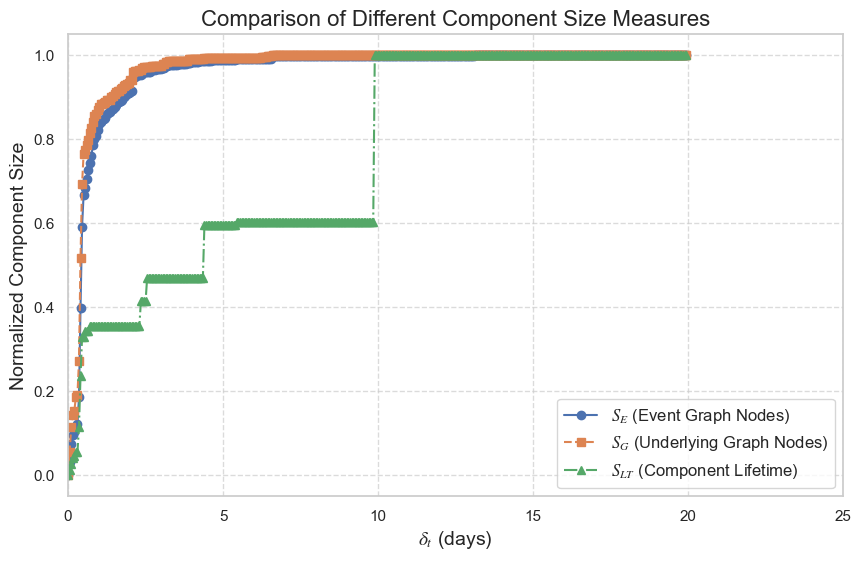


Correlation between measures:
           S_E       S_G      S_LT
S_E   1.000000  0.995826  0.557000
S_G   0.995826  1.000000  0.523933
S_LT  0.557000  0.523933  1.000000


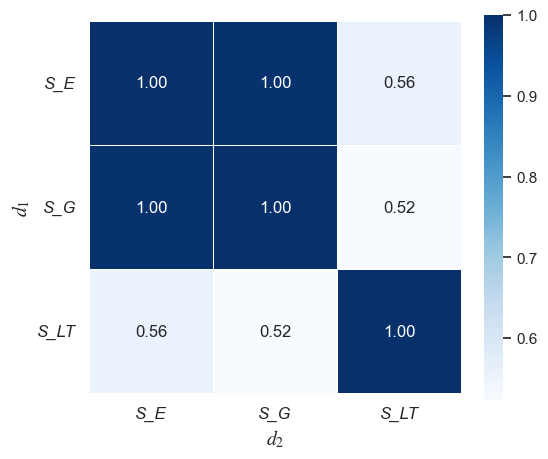

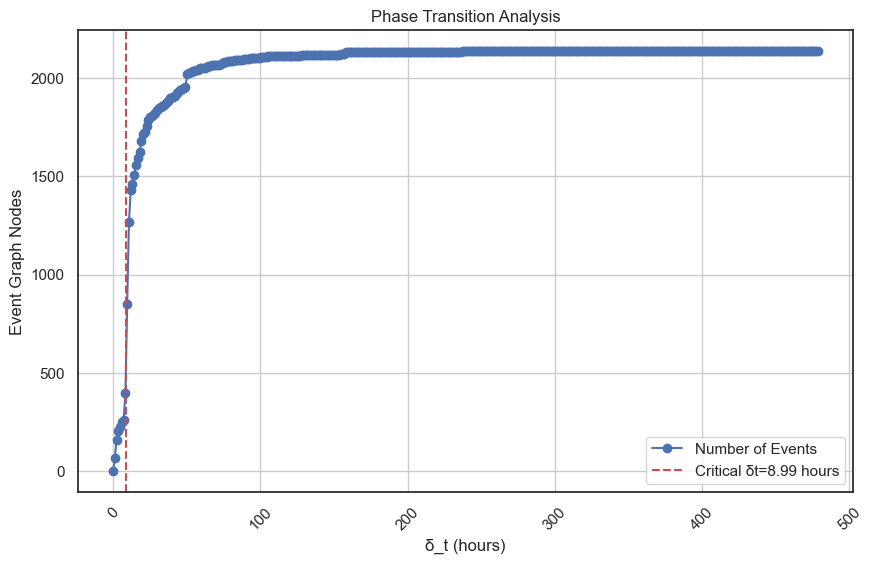

In [26]:
delta_t_values = np.array([float(k) for k in analysis_results.keys()])

bipartite_percolation.compare_component_measures(analysis_results)
bipartite_percolation.plot_largest_component(analysis_results, delta_t_values)

Total Values:
NE: 2447, NG: 680, NLT: 478.4002685546875


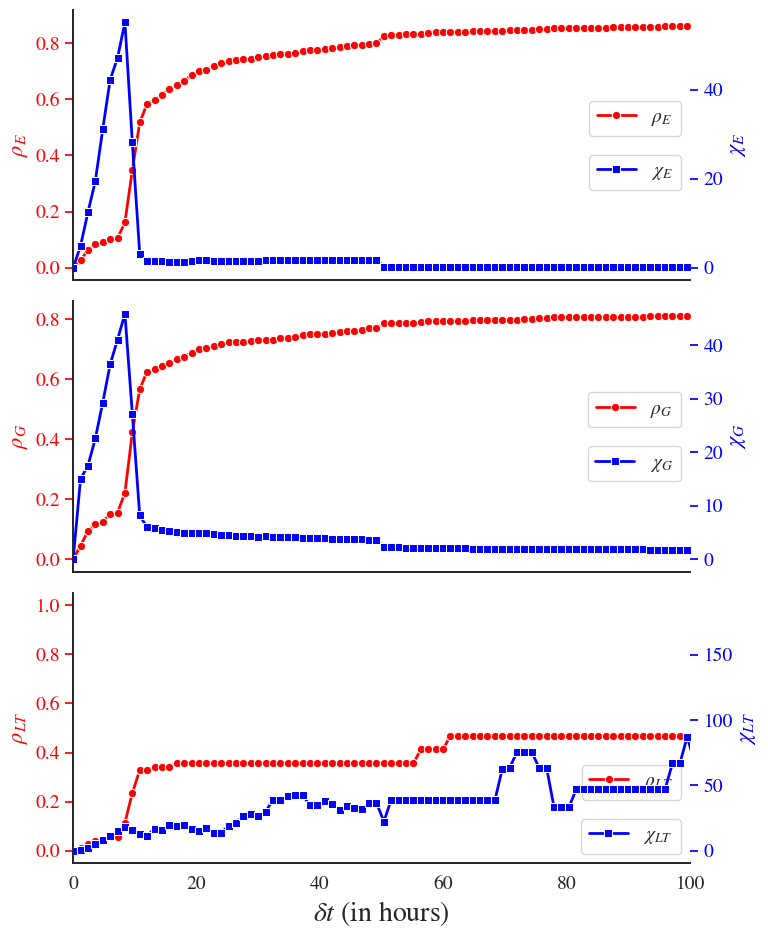

In [29]:
delta_t_values, rho_E, rho_G, rho_LT, chi_E, chi_G, chi_LT, P_S_E_distributions, P_S_LT_distributions, P_S_G_distributions = bipartite_percolation.compute_order_parameters(analysis_results, temporal_graph)


rho_metrics = [rho_E, rho_G, rho_LT]
chi_metrics = [chi_E, chi_G, chi_LT]
labels = [(r'$\rho_E$', r'$\chi_E$'), (r'$\rho_G$', r'$\chi_G$'), (r'$\rho_{LT}$', r'$\chi_{LT}$')]

colors = ('red', 'blue')
plt.rcParams.update({
    "font.size": 14,
    "axes.labelsize": 18,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.fontsize": 16,
    "axes.titlesize": 20,
    "mathtext.fontset": "stix",
    "font.family": "STIXGeneral"
})

bipartite_percolation.plot_percolation_metrics(delta_t_values, rho_metrics, chi_metrics,labels, colors, time_range=100)


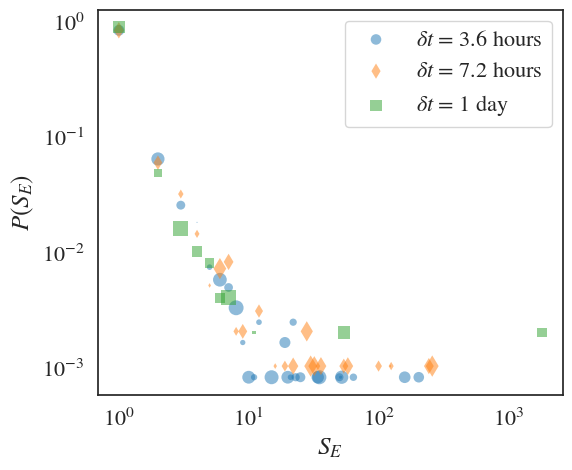

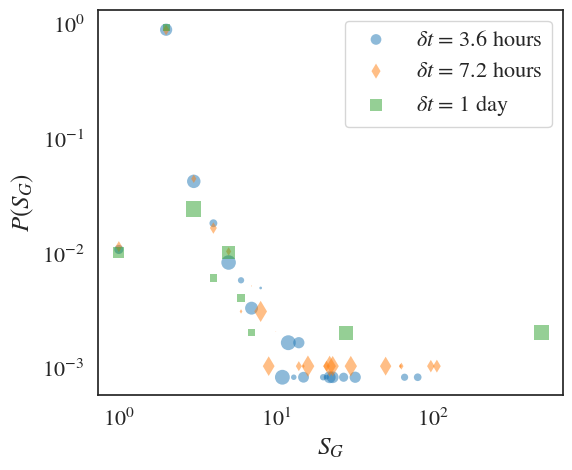

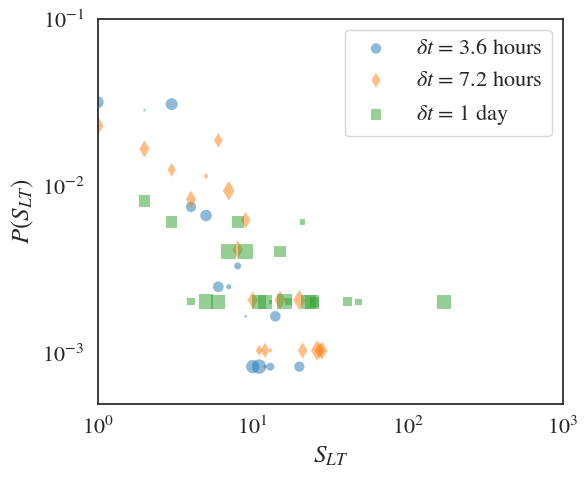

In [31]:
selected_delta_t_values = [3.5969945697577277, 7.193989139515455, 25.178961988304096]

color_cycle = itertools.cycle(['tab:blue', 'tab:orange', 'tab:green'])
marker_cycle = itertools.cycle(['o', 'd', 's'])

colors = {dt: next(color_cycle) for dt in selected_delta_t_values}
markers = {dt: next(marker_cycle) for dt in selected_delta_t_values}

# P(S_E)
fig, ax = plt.subplots(figsize=(6, 5))
for dt in selected_delta_t_values:
    if dt in P_S_E_distributions:
        sizes = np.array(list(P_S_E_distributions[dt].keys()))
        probabilities = np.array(list(P_S_E_distributions[dt].values()))
        scale = 120.0 * np.random.rand(len(sizes)) 

        if dt > 24:
            ax.scatter(sizes, probabilities,
                    label=rf"$\delta t$ = {int(dt/24)} day",
                    marker=markers[dt], c=colors[dt],
                    s=scale, alpha=0.5, edgecolors='none')
        else:
            ax.scatter(sizes, probabilities,
                    label=rf"$\delta t$ = {dt:.1f} hours",
                    marker=markers[dt], c=colors[dt],
                    s=scale, alpha=0.5, edgecolors='none')

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("$S_E$")
ax.set_ylabel("$P(S_E)$")
ax.legend()
plt.show()

# P(S_G)
fig, ax = plt.subplots(figsize=(6, 5))
for dt in selected_delta_t_values:
    if dt in P_S_G_distributions:
        sizes = np.array(list(P_S_G_distributions[dt].keys()))
        probabilities = np.array(list(P_S_G_distributions[dt].values()))
        scale = 120.0 * np.random.rand(len(sizes))

        if dt > 24:
            ax.scatter(sizes, probabilities,
                    label=rf"$\delta t$ = {int(dt/24)} day",
                    marker=markers[dt], c=colors[dt],
                    s=scale, alpha=0.5, edgecolors='none')
        else:
            ax.scatter(sizes, probabilities,
                    label=rf"$\delta t$ = {dt:.1f} hours",
                    marker=markers[dt], c=colors[dt],
                    s=scale, alpha=0.5, edgecolors='none')

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("$S_{G}$")
ax.set_ylabel("$P(S_{G})$")
ax.legend(loc="upper right")
plt.show()

# P(S_LT)
fig, ax = plt.subplots(figsize=(6, 5))
for dt in selected_delta_t_values:
    if dt in P_S_LT_distributions:
        sizes = np.array(list(P_S_LT_distributions[dt].keys()))
        probabilities = np.array(list(P_S_LT_distributions[dt].values()))
        scale = 120.0 * np.random.rand(len(sizes))

        if dt > 24:
            ax.scatter(sizes, probabilities,
                    label=rf"$\delta t$ = {int(dt/24)} day",
                    marker=markers[dt], c=colors[dt],
                    s=scale, alpha=0.5, edgecolors='none')
        else:
            ax.scatter(sizes, probabilities,
                    label=rf"$\delta t$ = {dt:.1f} hours",
                    marker=markers[dt], c=colors[dt],
                    s=scale, alpha=0.5, edgecolors='none')

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(10**-0, 10**3)  

ax.set_ylim(10**-3.3, 10**-1)  

ax.set_xlabel("$S_{LT}$")
ax.set_ylabel("$P(S_{LT})$")
ax.legend(loc="upper right")
plt.show()